In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
marketing_data <- read_delim("/home/jovyan/toy_ds_project/marketing_campaign.csv")
marketing_data    

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr   (2): Education, Marital_Status
dbl  (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, Mnt...
date  (1): Dt_Customer

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,2013-09-09,16,520,⋯,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635,0,1,2012-11-13,34,235,⋯,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,⋯,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351,1,0,2013-06-06,19,14,⋯,9,0,0,0,0,0,0,3,11,1


Year_Birth,Education,Income
<dbl>,<chr>,<dbl>
1957,Graduation,58138
1954,Graduation,46344
1965,Graduation,71613
1984,Graduation,26646
1981,PhD,58293
1967,Master,62513
1971,Graduation,55635
1985,PhD,33454
1974,PhD,30351


Education,mean_income
<chr>,<dbl>
2n Cycle,47633.19
Basic,20306.26
Graduation,52720.37
Master,52917.53
PhD,56145.31


Warning message:
“Removed 278 rows containing missing values (geom_point).”


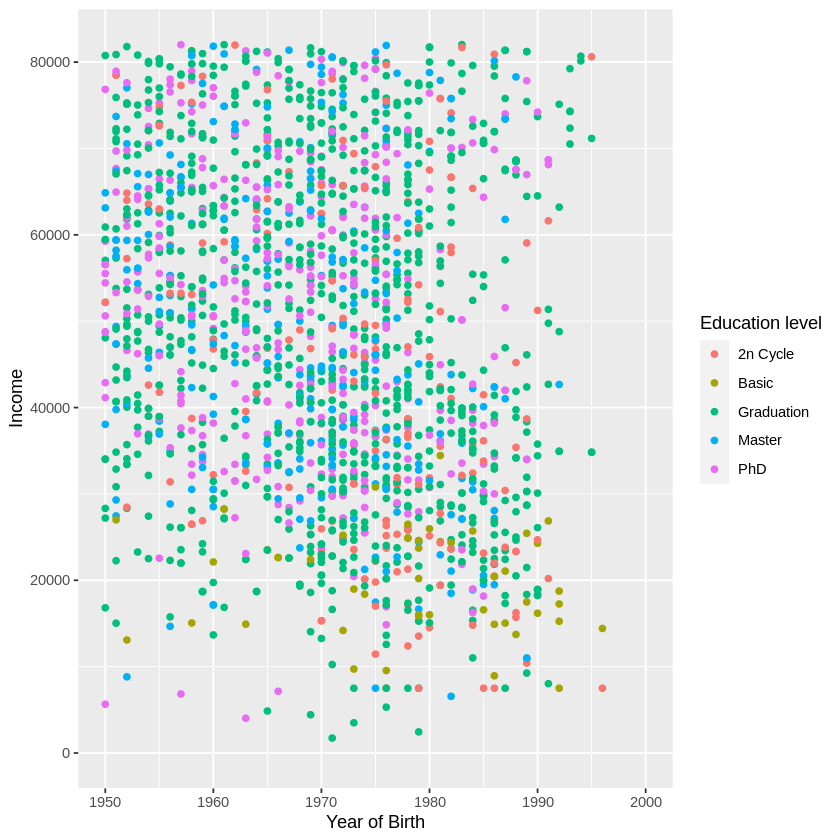

In [23]:
# tidy the data
marketing_data_tidy <- marketing_data |>
select(Year_Birth, Education, Income, Education) 

marketing_data_tidy

#summariz data in table
summary_data <- group_by(marketing_data_tidy, Education) |> 
summarize(mean_income = mean(Income, na.rm = TRUE))

summary_data

# plot the data
plot <- ggplot(marketing_data_tidy, aes(x = Year_Birth, y = Income, color = Education)) +
geom_point() +
labs( x = "Year of Birth", y = "Income", color = "Education level") +
ylim(c(0, 82032)) +
xlim(c(1950, 2000))

plot